In [191]:
# Import pandas and load the data is already cleaned
import pandas as pd

# Load the data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [122]:
# Display the columns of the data in a vertical list
df.columns.to_frame(index=False)


,0
0,customerID
1,gender
2,SeniorCitizen
3,Partner
4,Dependents
5,tenure
6,PhoneService
7,MultipleLines
8,InternetService
9,OnlineSecurity


In [4]:
# Display the first few rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Display the last few rows of the dataset
df.tail()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
# Display the shape of the dataset
df.shape

(7043, 21)

#### Check for empty string occurence in each column

In [204]:
# Display empty strings in the dataset

# Select only string columns
string_columns = df.select_dtypes(include=['object']).columns

df_copy = df.copy()

# Count occurrences of empty strings in each column
empty_strings_per_column = df_copy[string_columns].apply(lambda x: (x.str.strip() == "").sum())

# Display occurrences of empty strings in each column
print("Occurrences of empty strings per column:")
print(empty_strings_per_column[empty_strings_per_column > 0])  # Show only columns with empty strings


Occurrences of empty strings per column:
Series([], dtype: int64)


#### Check for empty string occurence in each row

In [205]:
# Count occurrences of empty strings in each row
empty_strings_per_row = df_copy[string_columns].apply(lambda x: (x.str.strip() == "").sum(), axis=1)

# Display rows with empty strings and their counts
df_copy['Empty_String_Count'] = empty_strings_per_row  # Add the count as a new column
rows_with_empty_strings = df_copy[df_copy['Empty_String_Count'] > 0]

print("Rows with empty strings and their counts:")
print(rows_with_empty_strings[['customerID', 'Empty_String_Count']])  # Show specific columns and the count

del df_copy  # Remove the copy of the dataframe


Rows with empty strings and their counts:
Empty DataFrame
Columns: [customerID, Empty_String_Count]
Index: []


In [92]:
# Display the data type of each column
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

#### Some initial checks

In [8]:
# Display the unique values of the 'Churn' column
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
# Check if customerID is unique
df['customerID'].is_unique

True

In [10]:
# Check if there are any missing values in the dataset
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [123]:
# Check if there are any duplicate rows in the dataset
df.duplicated().sum()

0

In [132]:
# Check the number of unique values in each column
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

####  Checking if the columns  gender, Partner, Dependents, PhoneService, PaperlessBilling, and Churn are binary and applying LabelEncoding to them for optimization.

In [194]:
# Checking if the columns  gender, Partner, Dependents, PhoneService, PaperlessBilling, and Churn are binary
check1 = df[['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']].nunique() == 2

# Check if the values in Gender are Male or Female strictly
check2 = df['gender'].isin(['Male', 'Female']).all() and not df['gender'].isin(['male', 'female']).any()

# Check if Partner, Dependents, PhoneService, PaperlessBilling, and Churn columns have values Yes or No strictly
check3 = df[['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']].isin(['Yes', 'No']).all()

# if all the checks are passed, print True
print(check1.all() and check2 and check3.all())



True


In [195]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Columns with binary values to encode
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_columns:
    # Encoding details:
    # For binary columns:
    # Yes -> 1
    # No -> 0
    # For gender:
    # Male -> 1
    # Female -> 0
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows of the updated DataFrame
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [196]:
# Using One-Hot Encoding for nominal variables
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService',
                                  'OnlineSecurity', 'OnlineBackup', 
                                  'DeviceProtection', 'TechSupport', 
                                  'StreamingTV', 'StreamingMovies', 
                                  'Contract', 'PaymentMethod'], drop_first=True)

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


In [202]:
# since the TotalCharges has empty strings, we need to drop them and convert the column to float

# Drop rows with empty strings in the 'TotalCharges' column
df = df[df['TotalCharges'].str.strip() != ""]

# Convert the 'TotalCharges' column to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])



In [203]:
# Display the data type of TotalCharges now
df['TotalCharges'].dtype

dtype('float64')

In [143]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.dtypes


customerID                                object
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes

In [206]:
# Display the summary statistics of the dataset
df.describe()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [208]:
# Dropping the customerID column
df.drop(columns=['customerID'], inplace=True)
df.isna().sum()


gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

### General splitting for models

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Splitting the dataset into features and target variable
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']                # Target variable

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Logistic Regression Model

In [229]:
from sklearn.linear_model import LogisticRegression

# Creating and training the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")


[[917 116]
 [186 188]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.55       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.79      0.78      1407

Accuracy: 78.54%


#### Decision Tree Model

In [228]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Accuracy score
dt_accuracy = accuracy_score(y_test, y_pred_dt) * 100
print(f"Accuracy: {dt_accuracy:.2f}%")




[[830 203]
 [185 189]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.51      0.49       374

    accuracy                           0.72      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.72      0.73      1407

Accuracy: 72.42%


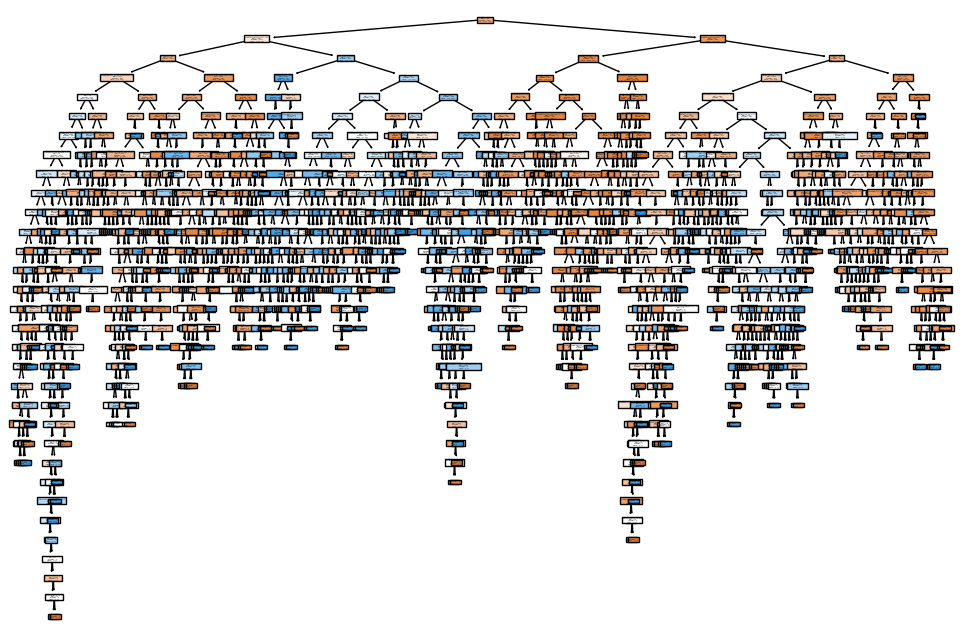

In [230]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns)
plt.show()
